# Project 3b

The final part of the project will ask you to perform your own data science project to classify a new dataset.

## Submission Details

**Project is due June 14th at 11:59 pm (Friday Midnight). To submit the project, please save the notebook
as a pdf file and submit the assignment via Gradescope. In addition, make sure that
all figures are legible and suﬀiciently large. For best pdf results, we recommend printing the notebook using [$\LaTeX$](https://www.latex-project.org/)**

## Loading Essentials and Helper Functions 

In [1]:
import multiprocessing
# fix for windows memory leak with MKL
import os
import platform

if platform.system() == "Windows":
    os.environ["OMP_NUM_THREADS"] = "2"

In [1]:
# import libraries
import time
import random
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # this is used for the plot the graph

# Sklearn classes
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    KFold,
)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, silhouette_score
import sklearn.metrics.cluster as smc
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    MinMaxScaler,
)
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import tree
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs

from helper import (
    draw_confusion_matrix,
    heatmap,
    make_meshgrid,
    plot_contours,
    draw_contour,
)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Sets random seed for reproducibility
SEED = 42
random.seed(SEED)

# (100 pts) Putting it all together: Classify your own data

Through the course of this program, you have acquired knowledge and skills in applying various models to tackle supervised learning tasks. Now, we challenge you to harness your cumulative learning and create a model capable of predicting whether a hotel reservation will be canceled or not.

### Context
Hotels welcome millions of guests every year, and their primary objective is to keep rooms occupied and paid for. Cancellations can be detrimental to the business, as it may become challenging to rebook a room on short notice. Consequently, it is beneficial for hotels to anticipate which reservations are likely to be canceled. The provided dataset offers a diverse range of information about bookings, which you will utilize to predict cancellations.

### Challenge
The goal of this project is to develop a predictive model that can determine whether a reservation will be canceled based on the available input parameters.

While we will provide specific instructions to guide you in the right direction, you have the freedom to choose the models and preprocessing techniques that you deem most appropriate. Upon completion, we request that you provide a detailed description outlining the models you selected and the rationale behind your choices.

### Data Description
Refer to https://www.kaggle.com/competitions/m-148-spring-2024-project-3/data for information

## (50 pts) Preprocessing
For the dataset, the following are mandatory pre-processing steps for your data:

- **Use One-Hot Encoding on all categorical features** (specify whether you keep the extra feature or not for features with multiple values)
- Determine which fields need to be dropped
- **Handle missing values** (Specify your strategy)
- **Rescale the real valued features using any strategy you choose** (StandardScaler, MinMaxScaler, Normalizer, etc)
- **Augment at least one feature**
- **Implement a train-test split with 20% of the data going to the test data**. Make sure that the test and train data are balanced in terms of the desired class.

After writing your preprocessing code, write out a description of what you did for each step and provide a justification for your choices. All descriptions should be written in the markdown cells of the jupyter notebook. Make sure your writing is clear and professional.  

We highly recommend reading through the [scikit-learn documentation](https://scikit-learn.org/stable/data_transforms.html) to make this part easier.

## (50 pts) Try out a few models
Now that you have pre-processed your data, you are ready to try out different models. 

For this part of the project, we want you to experiment with all the different models demonstrated in the course to determine which one performs best on the dataset.

You must perform classification using at least 3 of the following models:
- Logistic Regression
- K-nearest neighbors
- SVM
- Decision Tree
- Multi-Layer Perceptron

Due to the size of the dataset, be careful which models you use and look at their documentation to see how you should tackle this size issue for each model.

For full credit, you must perform some hyperparameter optimization on your models of choice. You may find the following scikit-learn library on [hyperparameter optimization](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) useful.

For each model chosen, write a description of which models were chosen, which parameters you optimized, and which parameters you choose for your best model. 
While the previous part of the project asked you to pre-process the data in a specific manner, you may alter pre-processing step as you wish to adjust for your chosen classification models.


In [2]:
# TODO
data = pd.read_csv('datasets/hotel_booking.csv')

In [3]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,name,email,phone-number
0,City Hotel,1,157,May,1,3,2,0.0,0,BB,...,0,Non Refund,0,Transient,130.00,0,0,Taylor Juarez,Juarez.Taylor44@zoho.com,634-458-8010
1,Resort Hotel,0,167,September,2,8,2,0.0,0,BB,...,0,No Deposit,0,Contract,62.48,0,2,Yolanda Taylor,Taylor.Yolanda35@xfinity.com,571-733-2380
2,City Hotel,0,124,April,1,1,2,0.0,0,SC,...,0,No Deposit,0,Transient,99.00,0,1,Angie Dixon,Angie_Dixon@hotmail.com,818-661-8987
3,Resort Hotel,0,8,July,2,4,2,1.0,0,BB,...,0,No Deposit,0,Transient,169.00,1,2,Jennifer Higgins,Higgins.Jennifer@yandex.com,669-803-3888
4,City Hotel,0,43,July,0,2,2,0.0,0,HB,...,1,No Deposit,0,Transient-Party,43.00,0,0,Jeremy Wilcox,Jeremy_Wilcox@hotmail.com,100-100-0744


In [5]:
data.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,69591.000000,69591.000000,69591.000000,69591.000000,69591.000000,69588.000000,69591.000000,69591.000000,69591.000000,69591.000000,69591.000000,69591.000000,69591.000000,69591.000000
mean,0.405814,109.181546,0.880746,2.434280,1.839088,0.089081,0.008708,0.107571,0.177566,0.203015,2.795031,98.175805,0.065641,0.509060
std,0.491052,113.714559,0.983784,1.852226,0.617512,0.369929,0.105919,0.860100,1.747278,0.597184,19.475713,52.222296,0.248870,0.767946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000
50%,0.000000,71.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000
75%,1.000000,169.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,709.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69591 entries, 0 to 69590
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           69591 non-null  object 
 1   is_canceled                     69591 non-null  int64  
 2   lead_time                       69591 non-null  int64  
 3   arrival_date_month              69591 non-null  object 
 4   stays_in_weekend_nights         69591 non-null  int64  
 5   stays_in_week_nights            69591 non-null  int64  
 6   adults                          69591 non-null  int64  
 7   children                        69588 non-null  float64
 8   babies                          69591 non-null  int64  
 9   meal                            69591 non-null  object 
 10  country                         69591 non-null  object 
 11  previous_cancellations          69591 non-null  int64  
 12  previous_bookings_not_canceled  

In [5]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          3
babies                            0
meal                              0
country                           0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
name                              0
email                             0
phone-number                      0
dtype: int64

In [4]:
#Drop name, email, and phone-number

data = data.drop(['email'], axis=1)
data = data.drop(['name'], axis=1)
data = data.drop(["phone-number"], axis=1)

In [5]:
#We replace the nulls in the "children" column with the mean of all the entries

children_mean = data['children'].mean()
data['children'] = data['children'].fillna(children_mean)

In [6]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [10]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.325035,-0.012646,0.020547,0.057119,-0.017046,-0.036172,0.119731,-0.069415,-0.169467,0.068343,0.039120,-0.217974,-0.250600
lead_time,0.325035,1.000000,0.077709,0.161207,0.121836,-0.053364,-0.024525,0.087934,-0.082213,-0.018346,0.173999,-0.056644,-0.130878,-0.124873
stays_in_weekend_nights,-0.012646,0.077709,1.000000,0.496325,0.107475,0.048382,0.020723,-0.017853,-0.044502,0.059505,-0.047114,0.063900,-0.014512,0.083285
stays_in_week_nights,0.020547,0.161207,0.496325,1.000000,0.106628,0.049115,0.023206,-0.027115,-0.051201,0.093595,-0.002890,0.092229,-0.019695,0.076144
adults,0.057119,0.121836,0.107475,0.106628,1.000000,0.041112,0.019446,-0.008290,-0.111149,-0.050721,-0.005021,0.199375,0.012908,0.114375
children,-0.017046,-0.053364,0.048382,0.049115,0.041112,1.000000,0.031180,-0.027002,-0.021005,0.061305,-0.033876,0.302059,0.060418,0.097196
babies,-0.036172,-0.024525,0.020723,0.023206,0.019446,0.031180,1.000000,-0.009021,-0.007501,0.089957,-0.011799,0.035989,0.043187,0.109622
previous_cancellations,0.119731,0.087934,-0.017853,-0.027115,-0.008290,-0.027002,-0.009021,1.000000,0.179474,-0.030628,0.005102,-0.060141,-0.023254,-0.046597
previous_bookings_not_canceled,-0.069415,-0.082213,-0.044502,-0.051201,-0.111149,-0.021005,-0.007501,0.179474,1.000000,0.015360,-0.012209,-0.070332,0.051581,0.054334
booking_changes,-0.169467,-0.018346,0.059505,0.093595,-0.050721,0.061305,0.089957,-0.030628,0.015360,1.000000,-0.016639,0.027872,0.085920,0.066459


In [11]:
corr_matrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.325035
previous_cancellations            0.119731
days_in_waiting_list              0.068343
adults                            0.057119
adr                               0.039120
stays_in_week_nights              0.020547
stays_in_weekend_nights          -0.012646
children                         -0.017046
babies                           -0.036172
previous_bookings_not_canceled   -0.069415
booking_changes                  -0.169467
required_car_parking_spaces      -0.217974
total_of_special_requests        -0.250600
Name: is_canceled, dtype: float64

In [7]:
#Augmneted Feature
#Total Guests - There is not column indicating the total number of guests per room
#Could be a helpful in our analysis

data["total_guests"] = data['adults'] +data['children'] + data['babies']
print(data["total_guests"].head())



0    2.0
1    2.0
2    2.0
3    3.0
4    2.0
Name: total_guests, dtype: float64


In [8]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          478
arrival_date_month                  12
stays_in_weekend_nights             14
stays_in_week_nights                29
adults                              14
children                             6
babies                               5
meal                                 5
country                              5
previous_cancellations              13
previous_bookings_not_canceled      66
reserved_room_type                  10
booking_changes                     16
deposit_type                         3
days_in_waiting_list               120
customer_type                        4
adr                               6313
required_car_parking_spaces          4
total_of_special_requests            6
total_guests                        16
dtype: int64

We separate the features into numerical and categorical. We use OneHotEncoder() to encode the categorical features and StandardScaler() to standardize the numerical features of the dataset. By one-hot encoding, categorical features that take more than two values keep the additional value(s). Standardization ensures that all numerical features contribute equally to the model preventing features with large magnitudes to dominate our results.

In [9]:
#Categorical and Numerical Features

categorical_features = ['hotel', 'arrival_date_month', 'meal', 'country', 'reserved_room_type', 'deposit_type', 'customer_type']
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guests']


In [10]:

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

In [11]:
X = data.drop('is_canceled', axis=1)
Y = data['is_canceled']
X_preprocessed = preprocessor.fit_transform(X)

#Train-test split with 20%
x_train, x_test, y_train, y_test = train_test_split(X_preprocessed, Y, test_size=0.2, stratify = Y, random_state = 0)


In [12]:
train_class_counts = y_train.value_counts()
print("Training Set Class Counts:")
print(train_class_counts)

# Checking the balance in the testing set
test_class_counts = y_test.value_counts()
print("Testing Set Class Counts:")
print(test_class_counts)

Training Set Class Counts:
is_canceled
0    33080
1    22592
Name: count, dtype: int64
Testing Set Class Counts:
is_canceled
0    8270
1    5649
Name: count, dtype: int64


We can see that our dataset is slightly imbalanced towards 0.

In [13]:
le = LabelEncoder()
data['target'] = le.fit_transform(data['is_canceled']) #is_canceled is the target

data["target"].value_counts()


target
0    41350
1    28241
Name: count, dtype: int64

KNN Classifier

The first model we try is KNN Classification. The simplicity and non-parametric nature of the model can be advantageous when dealing with complex datasets. However, scalability is problematic with this model. Given that our dataset is large, it may not be the best option. 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test,predicted)))

Accuracy:    0.840649


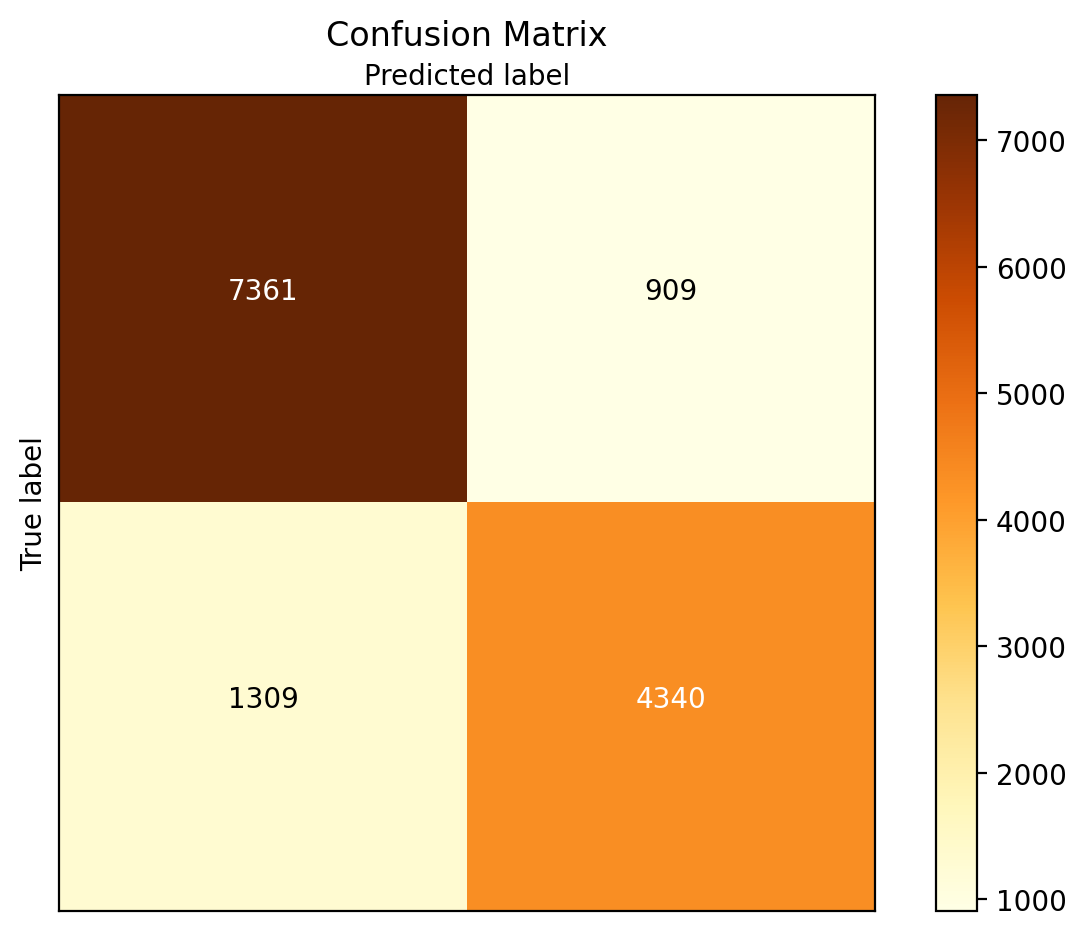

In [15]:
draw_confusion_matrix(y_test, predicted,classes=[])

In [21]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [1,3,5,7],
    'metric': ['euclidean','manhattan']
}



Due to the size of the dataset, running a GridSearch is very computationally expensive.

In [22]:
kf = KFold(n_splits=3, random_state=None)

grid_knn = GridSearchCV(knn, knn_param_grid, cv=kf, scoring = 'accuracy')
grid_knn.fit(x_train, y_train)
res_knn = pd.DataFrame(grid_knn.cv_results_)

res_knn


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012491,0.004792,1.046876,0.112254,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.820239,0.815757,0.816727,0.817574,0.001926,8
1,0.004913,0.000625,1.054590,0.031288,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.826220,0.825834,0.819475,0.823843,0.003093,6
2,0.005104,0.000567,0.973826,0.027751,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.828160,0.827720,0.822008,0.825963,0.002802,4
3,0.004505,0.000221,1.008609,0.037731,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.830801,0.825457,0.827127,0.827795,0.002232,3
4,0.006725,0.001793,4.341002,0.127681,manhattan,1,"{'metric': 'manhattan', 'n_neighbors': 1}",0.824227,0.817212,0.819098,0.820179,0.002964,7
5,0.007440,0.002183,4.489980,0.068842,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.826598,0.825726,0.821200,0.824508,0.002366,5
6,0.007440,0.002805,4.560153,0.078609,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.831393,0.827451,0.825026,0.827957,0.002624,2
7,0.005347,0.000936,4.300001,0.213455,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.829777,0.828259,0.827989,0.828675,0.000787,1


In [36]:
best_model_dt = grid_knn.best_estimator_
best_accuracy_dt = grid_knn.best_score_

print("Best Model (KNN):", best_model_dt)
print("Accuracy (KNN):", best_accuracy_dt)

Best Model (KNN): KNeighborsClassifier(metric='manhattan', n_neighbors=7)
Accuracy (KNN): 0.8286750772050868


We can see that our best model from the hyperparameter optimization is K = 7, metric "manhattan" with accuracy 0.8286

Logistic Regression

Logistic Regression is computationally efficient, making it suitable for large datasets such as this one. The model can also handle correlated features well and can be used to identify and select our most important features.

Accuracy:    0.805661


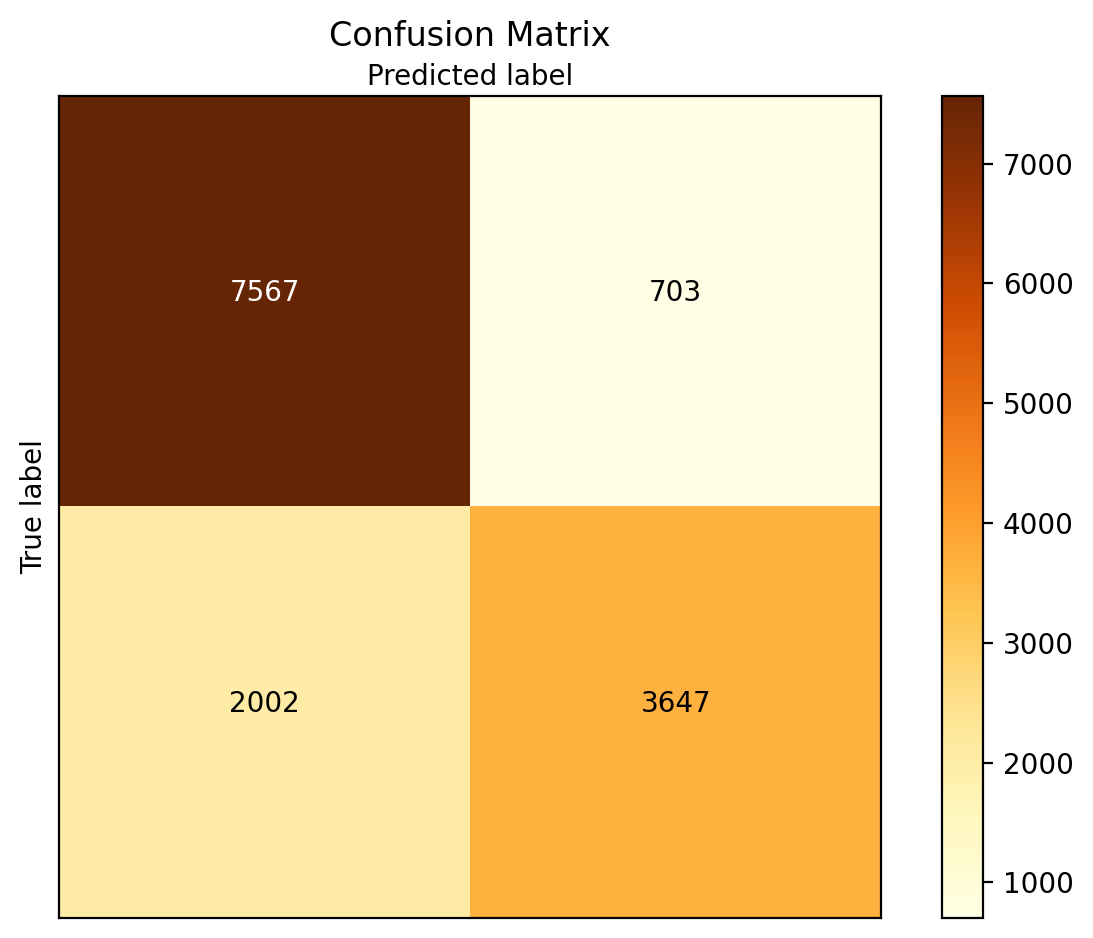

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)
testing_result = log_reg.predict(x_test)
predicted = log_reg.predict(x_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predicted)))
draw_confusion_matrix(y_test, predicted,classes=[])


In [21]:
#Randomized Search to reduce complexity and increase efficiency of search

from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression(max_iter=5000)
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear'],
    'C': [0.001,0.1, 10]
}

kf = KFold(n_splits=3, random_state=None)
random_search_lr = RandomizedSearchCV(lr, param_distributions=lr_param_grid, cv=kf, scoring = 'accuracy', n_iter = 10)

random_search_lr.fit(x_train, y_train)

res_random_lr = pd.DataFrame(random_search_lr.cv_results_)
#grid_lr = GridSearchCV(lr, lr_param_grid, cv=kf, scoring = 'accuracy')
#grid_lr.fit(x_train, y_train)
#res_lr = pd.DataFrame(grid_lr.cv_results_)





,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.960318,1.532674,0.004230,0.001510,saga,l2,0.1,"{'solver': 'saga', 'penalty': 'l2', 'C': 0.1}",0.804774,0.800291,0.806273,0.803779,0.002541,2
1,21.716816,4.059513,0.005232,0.002073,saga,l1,10,"{'solver': 'saga', 'penalty': 'l1', 'C': 10}",0.804235,0.799590,0.806704,0.803510,0.002949,5
2,1.203061,0.689982,0.002845,0.001359,liblinear,l1,10,"{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}",0.804343,0.799752,0.806596,0.803564,0.002848,3
3,22.642154,6.860627,0.005590,0.005171,saga,l1,0.001,"{'solver': 'saga', 'penalty': 'l1', 'C': 0.001}",0.780903,0.781322,0.784502,0.782242,0.001607,9
4,0.521517,0.102803,0.010761,0.012173,liblinear,l2,10,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}",0.804343,0.799752,0.806596,0.803564,0.002848,3
5,45.229284,5.257425,0.005215,0.001154,saga,l1,0.1,"{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}",0.804397,0.800183,0.805788,0.803456,0.002383,6
6,0.092700,0.002007,0.002394,0.000535,liblinear,l2,0.001,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.802134,0.799860,0.804171,0.802055,0.001761,8
7,1.846930,0.942093,0.009518,0.011014,liblinear,l1,0.1,"{'solver': 'liblinear', 'penalty': 'l1', 'C': ...",0.804397,0.800022,0.805895,0.803438,0.002492,7
8,0.296101,0.007439,0.010895,0.009274,liblinear,l2,0.1,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.804882,0.800345,0.806219,0.803815,0.002514,1
9,0.092372,0.002719,0.004358,0.002163,liblinear,l1,0.001,"{'solver': 'liblinear', 'penalty': 'l1', 'C': ...",0.780472,0.780999,0.784663,0.782045,0.001864,10


In [27]:
res_random_lr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.960318,1.532674,0.004230,0.001510,saga,l2,0.1,"{'solver': 'saga', 'penalty': 'l2', 'C': 0.1}",0.804774,0.800291,0.806273,0.803779,0.002541,2
1,21.716816,4.059513,0.005232,0.002073,saga,l1,10,"{'solver': 'saga', 'penalty': 'l1', 'C': 10}",0.804235,0.799590,0.806704,0.803510,0.002949,5
2,1.203061,0.689982,0.002845,0.001359,liblinear,l1,10,"{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}",0.804343,0.799752,0.806596,0.803564,0.002848,3
3,22.642154,6.860627,0.005590,0.005171,saga,l1,0.001,"{'solver': 'saga', 'penalty': 'l1', 'C': 0.001}",0.780903,0.781322,0.784502,0.782242,0.001607,9
4,0.521517,0.102803,0.010761,0.012173,liblinear,l2,10,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}",0.804343,0.799752,0.806596,0.803564,0.002848,3
5,45.229284,5.257425,0.005215,0.001154,saga,l1,0.1,"{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}",0.804397,0.800183,0.805788,0.803456,0.002383,6
6,0.092700,0.002007,0.002394,0.000535,liblinear,l2,0.001,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.802134,0.799860,0.804171,0.802055,0.001761,8
7,1.846930,0.942093,0.009518,0.011014,liblinear,l1,0.1,"{'solver': 'liblinear', 'penalty': 'l1', 'C': ...",0.804397,0.800022,0.805895,0.803438,0.002492,7
8,0.296101,0.007439,0.010895,0.009274,liblinear,l2,0.1,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.804882,0.800345,0.806219,0.803815,0.002514,1
9,0.092372,0.002719,0.004358,0.002163,liblinear,l1,0.001,"{'solver': 'liblinear', 'penalty': 'l1', 'C': ...",0.780472,0.780999,0.784663,0.782045,0.001864,10


In [29]:
best_model_lr = random_search_lr.best_estimator_
best_accuracy_lr = random_search_lr.best_score_


print("Best Model (Logistic Regression):", best_model_lr)
print("Accuracy (Logistic Regression):", best_accuracy_lr)


Best Model (Logistic Regression): LogisticRegression(C=0.1, max_iter=5000, solver='liblinear')
Accuracy (Logistic Regression): 0.803815184171443


For Logistic Regression, we see that hyperparameter optimization yields an accuracy of 0.803 with hyperparameters C = 0.1, solver = "liblinear".

Decision Tree

Next, we try Decision Trees. This model is generally scalable to large datasets with numerous features. Pruning and hyperparameter optimization is necessary as the model may not generalize well for our test dataset.

In [17]:
from sklearn import tree
clf = DecisionTreeClassifier(random_state=SEED)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

Accuracy:    0.841368
Confusion Matrix: 
 [[7116 1154]
 [1054 4595]]


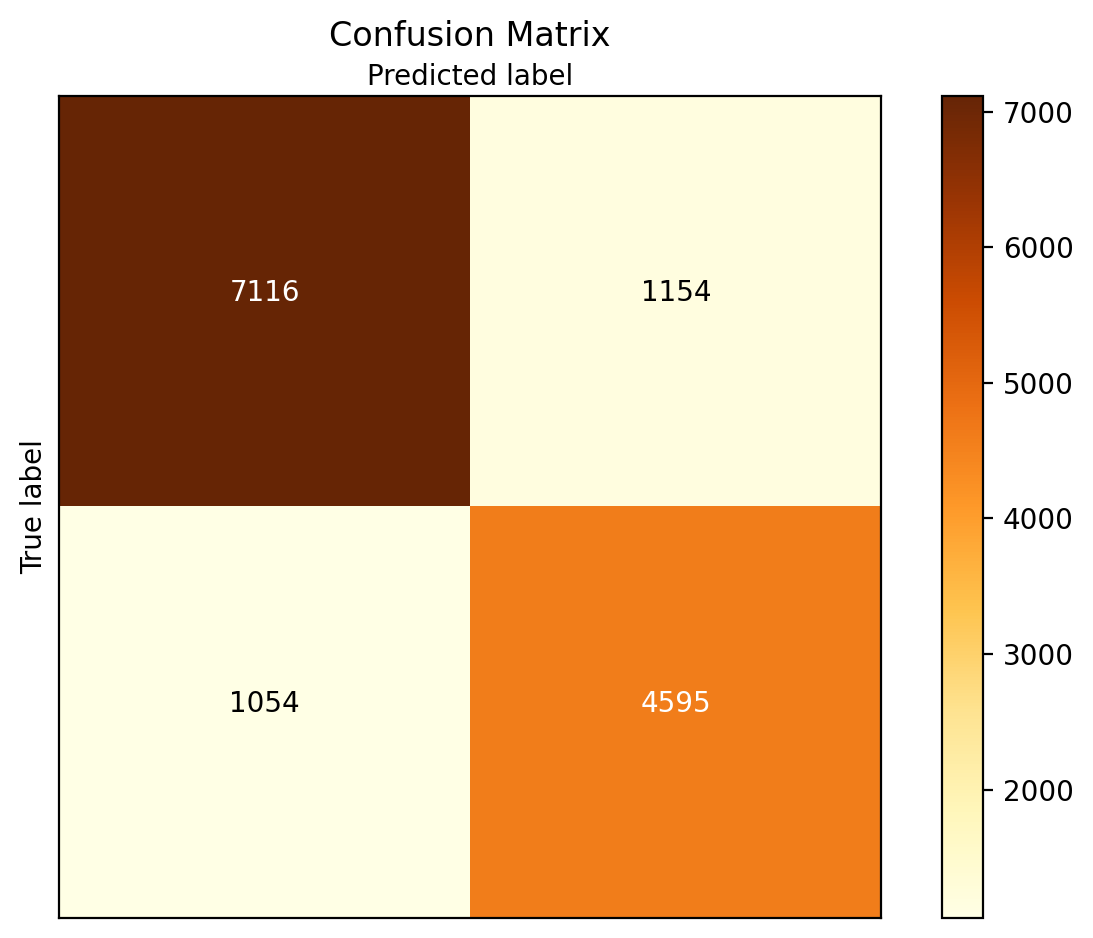

In [18]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test,predicted)))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, predicted))
draw_confusion_matrix(y_test, predicted,classes=[])

In [29]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

Accuracy:    0.839069
Confusion Matrix: 
 [[7115 1155]
 [1085 4564]]


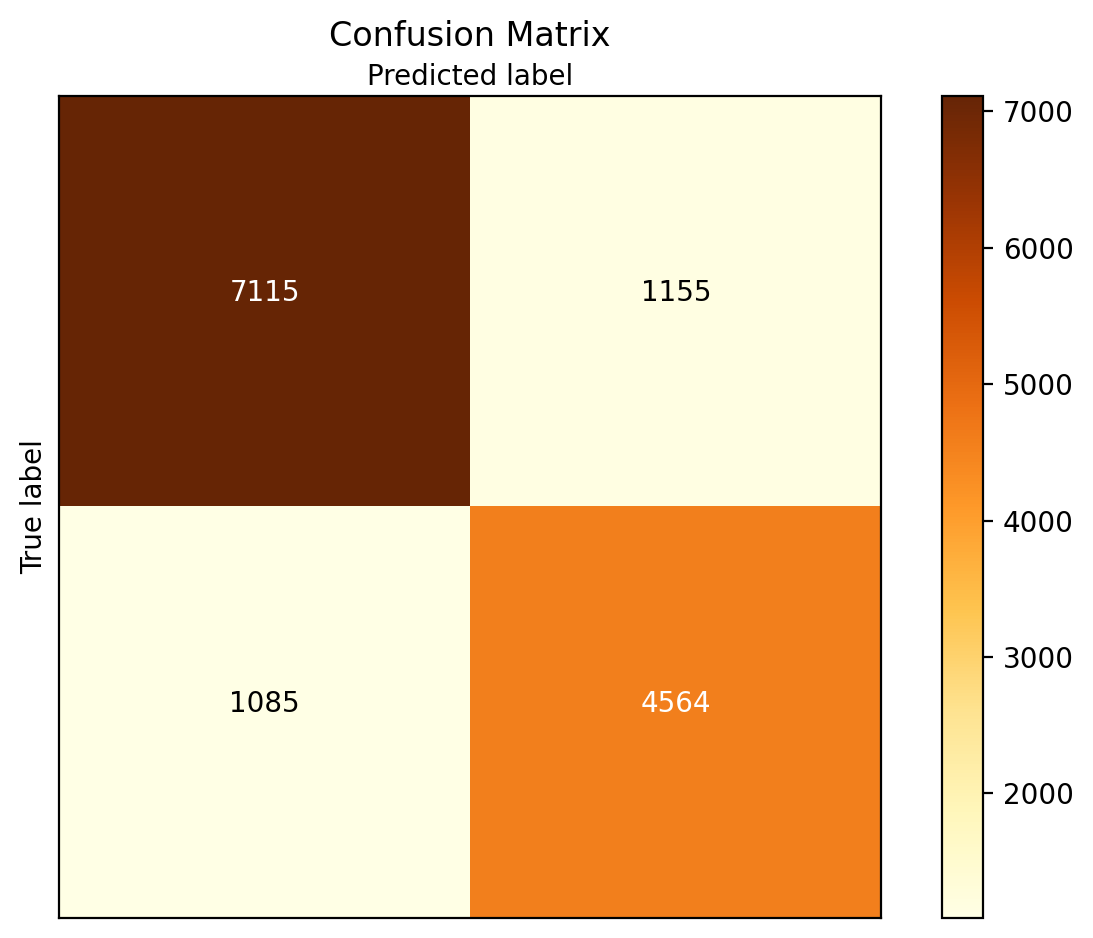

In [30]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test,predicted)))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, predicted))
draw_confusion_matrix(y_test, predicted,classes=[])

In [31]:
dt = DecisionTreeClassifier()
dt_param_grid = {
   "max_depth": [2, 4, 8, 16, 32],
    "min_samples_split": [2, 4, 8, 16],
    "criterion": ["gini", "entropy"],
}

grid_dt = GridSearchCV(dt, dt_param_grid, cv=5, scoring = 'accuracy')
grid_dt.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='accuracy')

In [32]:
res_dt = pd.DataFrame(grid_dt.cv_results_)
res_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056158,0.026759,0.002889,0.002231,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.762101,0.775123,0.779863,0.775552,0.773127,0.773154,0.005947,33
1,0.059502,0.014343,0.003700,0.002706,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.762101,0.775123,0.779863,0.775552,0.773127,0.773154,0.005947,33
2,0.048523,0.016446,0.001825,0.000305,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.762101,0.775123,0.779863,0.775552,0.773127,0.773154,0.005947,33
3,0.037221,0.000578,0.001433,0.000140,gini,2,16,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.762101,0.775123,0.779863,0.775552,0.773127,0.773154,0.005947,33
4,0.074885,0.008518,0.001784,0.000178,gini,4,2,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.783655,0.778536,0.783456,0.779235,0.777079,0.780392,0.002676,30
5,0.059198,0.002754,0.002020,0.000475,gini,4,4,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.783655,0.778536,0.783456,0.779235,0.777079,0.780392,0.002676,30
6,0.067301,0.002592,0.001753,0.000270,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.783655,0.778536,0.783456,0.779235,0.777079,0.780392,0.002676,30
7,0.061101,0.002833,0.001654,0.000073,gini,4,16,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.783655,0.778806,0.783456,0.779235,0.777169,0.780464,0.002617,29
8,0.098618,0.005414,0.001717,0.000151,gini,8,2,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.822362,0.821643,0.819831,0.810760,0.822705,0.819460,0.004462,18
9,0.107585,0.007480,0.002037,0.000297,gini,8,4,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.822362,0.821643,0.820190,0.810670,0.822885,0.819550,0.004532,17


In [33]:
top_5_models = res_dt.sort_values(by="rank_test_score").head(5)[
    ["rank_test_score", "param_max_depth", "param_min_samples_split", "param_criterion", "mean_test_score", "std_test_score"]
]

print(top_5_models)

    rank_test_score param_max_depth param_min_samples_split param_criterion  \
15                1              16                      16            gini   
12                2              16                       2            gini   
13                3              16                       4            gini   
32                4              16                       2         entropy   
33                5              16                       4         entropy   

    mean_test_score  std_test_score  
15         0.839919        0.005283  
12         0.839668        0.003852  
13         0.839434        0.003729  
32         0.839345        0.004135  
33         0.839273        0.003455  


In [34]:
best_model_dt = grid_dt.best_estimator_
best_accuracy_dt = grid_dt.best_score_

print("Best Model (Decision Tree):", best_model_dt)
print("Accuracy (Decision Tree):", best_accuracy_dt)

Best Model (Decision Tree): DecisionTreeClassifier(max_depth=16, min_samples_split=16)
Accuracy (Decision Tree): 0.8399194351149877


The Decision Tree is our best model so far with accuracy 0.839 (max_depth = 16 and min_samples_split=16)

Random Forest Classifier

The Random Forest Classifier improves performance of the decision tree and reduces overfitting by averaging multiple trees. In general, random forests work well with large datasets and better than individual decision trees

In [16]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)


In [17]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predicted)))

Accuracy:    0.879661


In [65]:
#Random Forrest Classifier with PCA
rf = RandomForestClassifier(random_state=SEED)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)

pca = PCA(n_components=0.9)
train_new = pca.fit_transform(x_train)
test_new = pca.transform(x_test)

rf_pca = RandomForestClassifier(random_state=SEED)
rf_pca.fit(train_new, y_train)
predicted_pca = rf_pca.predict(test_new)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predicted)))



Accuracy:    0.879517


We can see that the Random Forest Classifier has the best accuracy (0.87917) out of all the models in our analysis. The next step is to try our model on the hotel_booking_test.csv dataset and see whether it generalizes well or not. The Random Classifier accuracy did not improve with PCA

## Extra Credit 

We have provided an extra test dataset named `hotel_booking_test.csv` that does not have the target labels. Classify the samples in the dataset with any method of your choosing and save the predictions into a csv file. Submit the file to our [Kaggle](https://www.kaggle.com/competitions/m-148-spring-2024-project-3/) contest. The website will specify your classification accuracy on the test set. We will award a bonus point for the project for every percentage point over 75% that you get on your kaggle test accuracy.

To get the bonus points, you must also write out a summary of the model that you submit including any changes you made to the pre-processing steps. The summary must be written in a markdown cell of the jupyter notebook. Note that you should not change earlier parts of the project to complete the extra credit.

**Please refer to *Submission and evaluation* section on the contest page for the `csv` file formatting**

### Model description

In [42]:
#TODO
#Load the dataset

df = pd.read_csv('datasets/hotel_booking_test.csv')

In [43]:
df.head(10)

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,name,email,phone-number
0,City Hotel,107,June,0,2,2,0.0,0,BB,PRT,...,0,No Deposit,0,Transient-Party,130.00,0,1,Dustin Marshall,Dustin.Marshall@xfinity.com,833-801-0855
1,Resort Hotel,20,May,0,3,2,0.0,0,BB,PRT,...,0,No Deposit,0,Transient,91.67,0,0,Gregory Roberts,GRoberts17@verizon.com,881-819-0764
2,Resort Hotel,125,April,2,5,2,0.0,0,BB,GBR,...,0,No Deposit,0,Contract,42.95,0,1,Dustin Hardin,Dustin_Hardin@verizon.com,560-971-8576
3,Resort Hotel,0,August,1,1,2,0.0,0,BB,FRA,...,0,No Deposit,0,Transient,106.00,0,0,Kristy Stewart,Kristy.Stewart@mail.com,783-987-6285
4,City Hotel,124,August,0,1,2,0.0,0,BB,GBR,...,0,No Deposit,0,Transient,127.80,1,1,Deanna Leblanc,Deanna.Leblanc75@gmail.com,518-112-1761
5,Resort Hotel,0,August,0,0,2,0.0,0,BB,PRT,...,0,No Deposit,0,Transient,0.00,0,0,Rachel Strickland,Rachel.S@zoho.com,198-542-1981
6,Resort Hotel,2,March,0,1,1,0.0,0,BB,PRT,...,0,No Deposit,0,Transient,59.00,0,1,Frances Griffin,Griffin_Frances52@aol.com,860-203-0203
7,City Hotel,325,September,1,1,2,0.0,0,BB,PRT,...,0,Non Refund,0,Contract,62.00,0,0,Cassandra Randall,Randall.Cassandra@yahoo.com,608-952-5177
8,Resort Hotel,0,May,1,0,1,0.0,0,BB,PRT,...,0,No Deposit,0,Transient,62.50,1,0,Kelsey Keller,Kelsey.Keller@yandex.com,273-903-9157
9,City Hotel,48,November,1,3,2,0.0,0,BB,PRT,...,0,No Deposit,0,Contract,115.20,0,2,Shannon Alvarado,Shannon_Alvarado96@aol.com,655-585-9004


In [44]:
data_t = df.drop(['name', 'email', 'phone-number'], axis=1)

In [45]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17397 entries, 0 to 17396
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           17397 non-null  object 
 1   lead_time                       17397 non-null  int64  
 2   arrival_date_month              17397 non-null  object 
 3   stays_in_weekend_nights         17397 non-null  int64  
 4   stays_in_week_nights            17397 non-null  int64  
 5   adults                          17397 non-null  int64  
 6   children                        17397 non-null  float64
 7   babies                          17397 non-null  int64  
 8   meal                            17397 non-null  object 
 9   country                         17397 non-null  object 
 10  previous_cancellations          17397 non-null  int64  
 11  previous_bookings_not_canceled  17397 non-null  int64  
 12  reserved_room_type              

In [46]:
data_t.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [47]:
data_t["total_guests"] = data_t['adults'] +data_t['children'] + data_t['babies']
print(data_t["total_guests"].head())

#Added extra feature for processing


0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: total_guests, dtype: float64


In [48]:
categorical_features = ['hotel', 'arrival_date_month', 'meal', 'country', 'reserved_room_type', 'deposit_type', 'customer_type']
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guests']


In [49]:

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

Decision Tree Classifier - First model results

In [33]:
#X_test = data_t
#X_preprocessed_t = preprocessor.fit_transform(X_test)

#predictions = clf.predict(X_preprocessed_t)
#predictions

array([0, 1, 0, ..., 1, 0, 0])

Random Forest Classifier

In [50]:
X_test = data_t
X_preprocessed_t = preprocessor.fit_transform(X_test)

predictions = rf.predict(X_preprocessed_t)
predictions

array([0, 1, 0, ..., 0, 0, 1])

In [51]:
submission_rf = pd.DataFrame({
    'index': range(len(predictions)),
    'target': predictions
})

# Save the DataFrame to a CSV file without the index
submission_rf.to_csv('submission_rf.csv', index=False)


In [52]:
# Read the CSV file into a DataFrame
submission_rf = pd.read_csv('submission_rf.csv')

# Display the DataFrame
print(submission_rf)

       index  target
0          0       0
1          1       1
2          2       0
3          3       0
4          4       0
...      ...     ...
17392  17392       1
17393  17393       1
17394  17394       0
17395  17395       0
17396  17396       1

[17397 rows x 2 columns]


The Random Forest CLassifier performed with an accuracy of 0.872 on the test dataset